## Лабораторная работа 1
### Вариант 5

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [180]:
def show (y, title):
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot(y[:, 0], y[:, 1], y[:, 2])
    plt.title(title)

    plt.show()

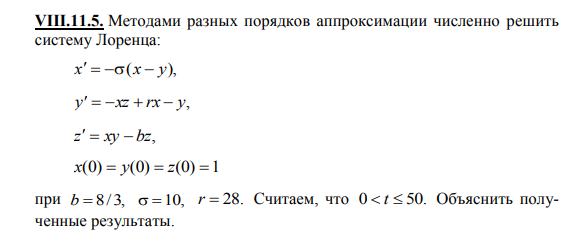

In [181]:
def func (t, y): 
    f = np.array(np.zeros(3))
    f[0] = -10*(y[0] - y[1])
    f[1] = -y[0]*y[2] + 28*y[0] - y[1]
    f[2] = y[0]*y[1] - 8/3 * y[2]

    return f

### Явный метод Рунге-Кутта (4-го порядка)

In [182]:
def rk (f, y_0, t_0, t_end, h):

    t_n = t_0
    y_n = y_0
    y = list()
    t = list()

    while t_n < t_end:

        k1 = f (t_n, y_n)
        k2 = f (t_n + h/2, y_n + h/2 * k1)
        k3 = f (t_n + h/2, y_n + h/2 * k2)
        k4 = f (t_n + h, y_n + h * k3)

        y_n1 = y_n + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        y.append(y_n)
        t.append(t_n)

        t_n += h
        y_n  = y_n1

    y = np.array(y)
    t = np.array(t)

    return y, t

### Метод Адамса

$ y_n = y_{n-1} + \frac{h}{2}(3f(t_{n-1}, y_{n-1}) - f(t_{n-2}, y_{n-2})) $

In [184]:
def adams (f, y_0, t_0, t_end, h):
    pre_calc = 2
    y_start, t_start = rk (f, y_0, t_0, t_0 + pre_calc*h, h)

    t_0 += (pre_calc + 1)*h
    t_n = t_0
    
    y = list(y_start)
    t = list(t_start)

    while t_n < t_end:
        y_n = y[-1] + h/2 * (3*f(t[-1], y[-1]) - f(t[-2], y[-2]))
        
        y.append(y_n)
        t.append(t_n)
        t_n += h

    y = np.array(y)
    t = np.array(t)

    return y, t

## ФДН

$ y_n -\frac{4}{3}y_{n-1} + \frac{1}{3}y_{n-2} = \frac{2}{3}hf(t_n, y_n) $ 

In [186]:
def bdf (f, y_0, t_0, t_end, h):
    pre_calc = 2
    y_start, t_start = rk (f, y_0, t_0, t_0 + pre_calc*h, h)

    t_0 += (pre_calc + 1)*h
    t_n = t_0
    
    y = list(y_start)
    t = list(t_start)

    while t_n < t_end:
        phi = lambda y_n: y_n - 4/3 * y[-1] + 1/3 * y[-2] - 2/3 * h*f(t_n, y_n)
        y_n = scipy.optimize.fsolve(phi, y[-1])
        
        y.append(y_n)
        t.append(t_n)
        t_n += h

    y = np.array(y)
    t = np.array(t)

    return y, t

### Графики

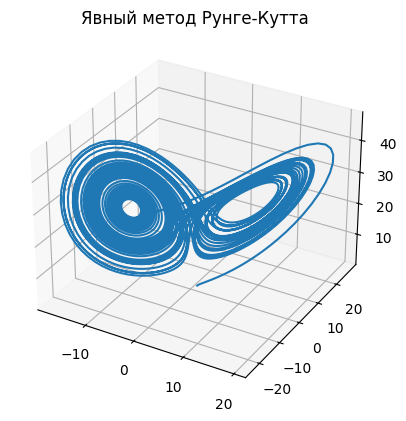

In [183]:
y_rk, t_rk = rk (func, np.array([1, 1, 1]), 0, 50, 0.01)

show (y_rk, "Явный метод Рунге-Кутта")

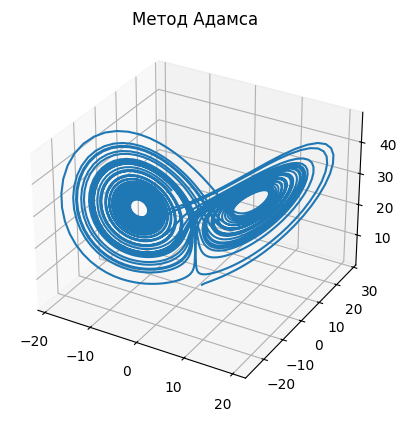

In [185]:
y_adams, t_adams = adams (func, np.array([1, 1, 1]), 0, 50, 0.01)

show (y_adams, "Метод Адамса")

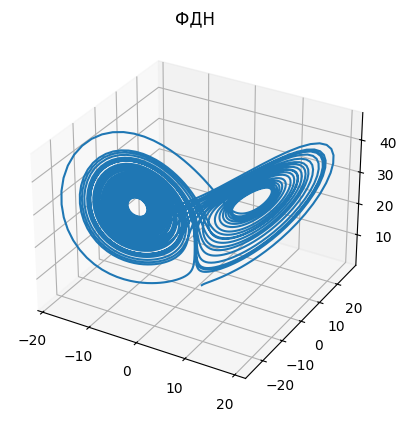

In [187]:
y_bdf, t_bdf = bdf (func, np.array([1, 1, 1]), 0, 50, 0.01)

show (y_bdf, "ФДН")